#import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#read csv file

In [2]:
df = pd.read_csv('deliveries.csv')
df.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


#Batsman Analysis(Virat Kohli)

In [3]:
filter = df['batsman']=='V Kohli'
df_kohli = df[filter]
df_kohli.shape

(3494, 21)

#Dismissal Type

<AxesSubplot:ylabel='dismissal_kind'>

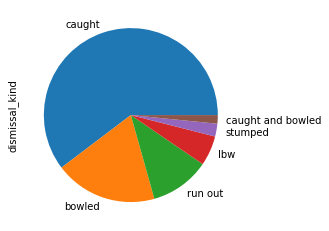

In [4]:
df_kohli['dismissal_kind'].value_counts().plot.pie()

In [5]:
def count(df,runs):
    return len(df[df['batsman_runs']==runs])*runs

#Plot how runs were scored

<AxesSubplot:>

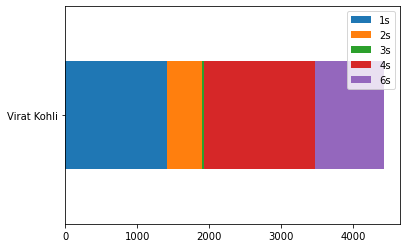

In [6]:
df1 = pd.DataFrame({'1s':count(df_kohli,1),'2s':count(df_kohli,2),'3s':count(df_kohli,3),'4s':count(df_kohli,4),'6s':count(df_kohli,6)}
                  ,index=['Virat Kohli'])
df1.plot.barh(stacked=True)

#Preform Team Name Abbreviation

In [7]:
df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [8]:
teams = {'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Daredevils':'DD', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'DC',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PWI', 'Rising Pune Supergiants':'RPS'    
}

In [9]:
df['batting_team'] = df['batting_team'].map(teams)
df['bowling_team'] = df['bowling_team'].map(teams)

#Runs scored by teams in each innings

In [10]:
runs = df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs.head()

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183


In [11]:
innings1 = runs[runs['inning']==1]
innings2 = runs[runs['inning']==2]

#Runs distribution in First Innings

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

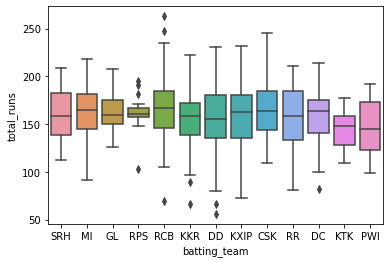

In [12]:
sns.boxplot(x='batting_team',y='total_runs',data=innings1)

#Runs distribution in second innings

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

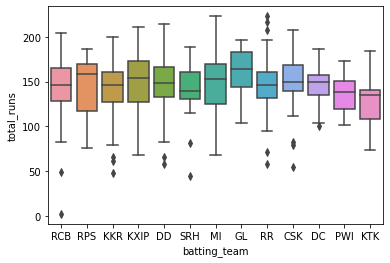

In [13]:
sns.boxplot(x='batting_team',y='total_runs',data=innings2)

In [14]:
high_scores= df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_scores.head()

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183


#Teams Scoring more than 200 runs

In [15]:
score_200 = high_scores[high_scores['total_runs']>=200]
score_200.head()

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209


#Number of times Teams have scored more than 200 runs

<AxesSubplot:xlabel='batting_team', ylabel='count'>

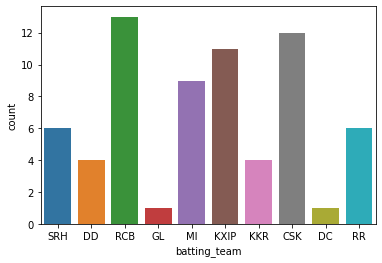

In [16]:
sns.countplot(x= score_200['batting_team'])

#Number of times teams are being hit for more than 200 runs

<AxesSubplot:xlabel='bowling_team', ylabel='count'>

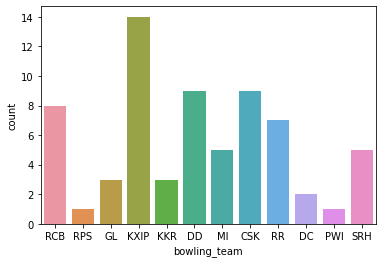

In [17]:
sns.countplot(x=score_200['bowling_team'])

#Balls played by each batsman

In [18]:
batsman_df = df.groupby('batsman')['ball'].count().reset_index()
batsman_df.head()

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57


#runs scored by each batsman

In [19]:
batsman_runs = df.groupby('batsman')['batsman_runs'].sum().reset_index()
batsman_runs.head()

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62


#Fours hit by all batsman

In [20]:
fours = df[df['batsman_runs']==4]
fours = fours.groupby('batsman')['batsman_runs'].count().reset_index()
fours.head()

,batsman,batsman_runs
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3


#Sixes hit by all batsman

In [21]:
sixes = df[df['batsman_runs']==6]
sixes = sixes.groupby('batsman')['batsman_runs'].count().reset_index()
sixes.head()

,batsman,batsman_runs
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1


#Merging batsman,fours,sixes dataframe to create dataframe for batsman data

In [22]:
player_df = batsman_runs.merge(batsman_df,left_on='batsman',right_on='batsman',how='inner')
player_df = player_df.merge(fours,left_on='batsman',right_on='batsman',how='outer')
player_df = player_df.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
player_df.columns=['Batsman','Runs','Balls','4s','6s']
player_df.head()

,Batsman,Runs,Balls,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,NaN,NaN
2,A Chopra,53,75,7.0,NaN
3,A Choudhary,25,20,1.0,1.0
4,A Flintoff,62,57,5.0,2.0


#Replace all Nan values with 0

In [23]:
player_df.fillna(0,inplace=True)
player_df['4s'] = player_df['4s'].astype(int)
player_df['6s'] = player_df['6s'].astype(int)
player_df.head()

,Batsman,Runs,Balls,4s,6s
0,A Ashish Reddy,280,196,16,15
1,A Chandila,4,7,0,0
2,A Chopra,53,75,7,0
3,A Choudhary,25,20,1,1
4,A Flintoff,62,57,5,2


#Calculate strike rate

In [24]:
player_df['Strike Rate'] = player_df['Runs']/player_df['Balls']*100
player_df.head()

,Batsman,Runs,Balls,4s,6s,Strike Rate
0,A Ashish Reddy,280,196,16,15,142.857143
1,A Chandila,4,7,0,0,57.142857
2,A Chopra,53,75,7,0,70.666667
3,A Choudhary,25,20,1,1,125.000000
4,A Flintoff,62,57,5,2,108.771930


In [25]:
grp = df.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp.head()

,match_id,batsman,batting_team,batsman_runs
0,1,A Choudhary,RCB,6
1,1,BCJ Cutting,SRH,16
2,1,CH Gayle,RCB,32
3,1,DA Warner,SRH,14
4,1,DJ Hooda,SRH,16


#Best score of each batsman

In [26]:
BestScore = grp.groupby('batsman')['batsman_runs'].max().reset_index()
BestScore.columns=['Batsman','Highest Score']
BestScore.head()

,Batsman,Highest Score
0,A Ashish Reddy,36
1,A Chandila,4
2,A Chopra,24
3,A Choudhary,15
4,A Flintoff,24


#Innings played by each batsman

In [27]:
Innings_played = grp.groupby('batsman')['batsman_runs'].count().reset_index()
Innings_played.columns = ['Batsman','Innings']
Innings_played.head()

,Batsman,Innings
0,A Ashish Reddy,23
1,A Chandila,2
2,A Chopra,6
3,A Choudhary,3
4,A Flintoff,3


In [28]:
player_df = player_df.merge(BestScore,left_on='Batsman',right_on='Batsman',how='outer')
player_df.head()

,Batsman,Runs,Balls,4s,6s,Strike Rate,Highest Score
0,A Ashish Reddy,280,196,16,15,142.857143,36
1,A Chandila,4,7,0,0,57.142857,4
2,A Chopra,53,75,7,0,70.666667,24
3,A Choudhary,25,20,1,1,125.000000,15
4,A Flintoff,62,57,5,2,108.771930,24


In [29]:
player_df = player_df.merge(Innings_played,left_on='Batsman',right_on='Batsman',how='inner')
player_df.head()

,Batsman,Runs,Balls,4s,6s,Strike Rate,Highest Score,Innings
0,A Ashish Reddy,280,196,16,15,142.857143,36,23
1,A Chandila,4,7,0,0,57.142857,4,2
2,A Chopra,53,75,7,0,70.666667,24,6
3,A Choudhary,25,20,1,1,125.000000,15,3
4,A Flintoff,62,57,5,2,108.771930,24,3


#Most runs scored by top 10 batsman

<AxesSubplot:xlabel='Batsman'>

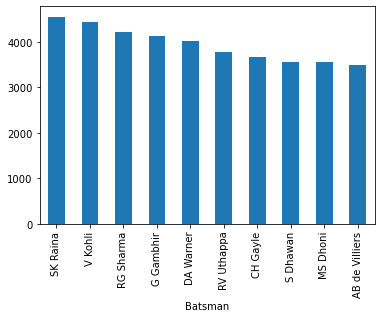

In [30]:
player_df.set_index('Batsman')['Runs'].sort_values(ascending=False)[:10].plot(kind='bar')

#Top 10 all time high scores

In [31]:
highScores = grp.set_index(['batsman','batting_team'])['batsman_runs'].sort_values(ascending=False)[:10].reset_index()
highScores.columns=['Batsman','Team','Runs']
highScores

,Batsman,Team,Runs
0,CH Gayle,RCB,175
1,BB McCullum,KKR,158
2,AB de Villiers,RCB,133
3,AB de Villiers,RCB,129
4,CH Gayle,RCB,128
5,M Vijay,CSK,127
6,DA Warner,SRH,126
7,V Sehwag,KXIP,122
8,PC Valthaty,KXIP,120
9,V Sehwag,DD,119


In [32]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [33]:
dismissalTypes = ['caught', 'bowled','lbw', 'caught and bowled',
       'stumped','hit wicket',]

#Dataframe to get dismissals by bowlers

In [34]:
bowler_df = df[df['dismissal_kind'].isin(dismissalTypes)]
bowler_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


#Top 10 highest wicket taking bowlers

<AxesSubplot:>

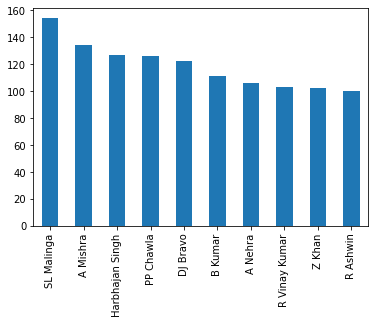

In [35]:
bowler_df['bowler'].value_counts()[:10].plot(kind='bar')

#Number of times a bowler got the wicket of a particular batsman

In [36]:
mostWickets = bowler_df.groupby(['batsman','bowler'])['dismissal_kind'].count().reset_index()
mostWickets.columns=['Batsman','Bowler','Wickets']
mostWickets = mostWickets.sort_values(by='Wickets',ascending=False).reset_index().drop('index',axis=1)
mostWickets.head(10)

,Batsman,Bowler,Wickets
0,MS Dhoni,Z Khan,7
1,AM Rahane,B Kumar,6
2,V Kohli,A Nehra,6
3,RG Sharma,R Vinay Kumar,6
4,MS Dhoni,PP Ojha,6
5,G Gambhir,Z Khan,6
6,RG Sharma,A Mishra,5
7,G Gambhir,PP Ojha,5
8,PA Patel,B Kumar,5
9,SR Watson,AR Patel,5
